<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
from numpy.random import RandomState

from scipy import stats as st

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

RANDOM_STATE = 12345

pd.set_option('display.max_columns', None)

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [3]:
data_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [4]:
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [8]:
display(data_train.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [9]:
display(data_test.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

Все столбцы, кроме 'date', имеют тип данных float64. Заменим тип данных столбца 'date' с object на datetime

In [10]:
# меняем тип данных object на datetime в столбце 'date'
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
display(data_full.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [12]:
# проверка пропусков 

print('Обучающая выборка')
print(data_train.isna().sum().sort_values(ascending=False))
print()
print('Тестовая выборка')
print(data_test.isna().sum().sort_values(ascending=False))
print()
print('Исходные данные')
print(data_full.isna().sum().sort_values(ascending=False))
print()
print()
print('Всего пропусков в обучающей выборке:', data_train.isna().sum().sum())
print()
print('Всего пропусков в тестовой выборке:', data_test.isna().sum().sum())
print()
print('Всего пропусков в исходных данных:', data_full.isna().sum().sum())

Обучающая выборка
secondary_cleaner.output.tail_sol           920
rougher.state.floatbank10_e_air             429
rougher.input.floatbank11_xanthate          407
primary_cleaner.output.concentrate_sol      265
final.output.concentrate_sol                192
                                           ... 
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_level      0
primary_cleaner.output.concentrate_au         0
primary_cleaner.state.floatbank8_b_level      0
Length: 87, dtype: int64

Тестовая выборка
secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.sta

In [13]:
print(data_test.duplicated().sum())
print(data_train.duplicated().sum())
data_full.duplicated().sum()

0
0


0

Вывод:

Датасет train содержит 87 столбцов и 14579 строк. 

Датасет test содержит 53 столбцов и 4860 строк. 

Датасет full содержит 87 столбцов и 19439 строк. 

Во всех датасетах есть пропуски. Видимо из-за того, что некоторые параметры замеряются и/или рассчитываются значительно позже.

Всего пропусков в обучающей выборке: 3050

Всего пропусков в тестовой выборке: 375

Всего пропусков в исходных данных: 4481

Тестовая выборка составляет 25% от исходных данных, обучающая выборка - 75% от исходных данных.

Все столбцы, кроме 'date', имеют тип данных float64, заменили тип данных столбца 'date' с object на datetime.

Дубликаты отсутствуют.


Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между расчётами и значением признака.

In [14]:
recovery=data_train

In [15]:
recovery=recovery.dropna().reset_index() 

In [16]:
rougher_output_recovery=recovery['rougher.output.recovery']
rougher_output_tail_au=recovery['rougher.output.tail_au']
rougher_input_feed_au=recovery['rougher.input.feed_au']
rougher_output_concentrate_au=recovery['rougher.output.concentrate_au']

In [17]:
# Функция для подсчета эффективности обогащения
def calc_rougher_output_recovery(rougher_output_concentrate,rougher_input_feed,rougher_output_tail):
    calc_rougher_output_recovery=((rougher_output_concentrate_au*(rougher_input_feed_au-rougher_output_tail_au))/(rougher_input_feed_au*(rougher_output_concentrate_au-rougher_output_tail_au)))*100
    return calc_rougher_output_recovery

In [18]:
calc_rougher_output_recovery(rougher_output_concentrate_au,rougher_input_feed_au,rougher_output_tail_au)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
12332    87.684717
12333    90.677361
12334    89.574376
12335    87.724007
12336    88.890579
Length: 12337, dtype: float64

In [19]:
rougher_output_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
12332    87.684717
12333    90.677361
12334    89.574376
12335    87.724007
12336    88.890579
Name: rougher.output.recovery, Length: 12337, dtype: float64

In [20]:
mae = mean_absolute_error(calc_rougher_output_recovery(rougher_output_concentrate_au,rougher_input_feed_au,rougher_output_tail_au), rougher_output_recovery)
print('MAE (среднее абсолютное отклонение) =', mae)

MAE (среднее абсолютное отклонение) = 9.906677443564516e-15


Абсолютная средняя ошибка MAE (среднее абсолютное отклонение) - степень несоответствия между фактическими и прогнозируемыми значениями - получилась очень маленькой (0.00000000000000973), следовательно, расчеты верны.

Проанализируем признаки в тестовой выборке и произведем предобработку данных.

Заполним пропуски. По условию данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи. Следовательно, можно заполнить пропуски с помощью функции ffill заполним отсутствующие значения в выборках и исходных данных. Эта функция заполняет пропуски предпоследним значением признака (значения даты расположены по возрастанию).

In [22]:
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)

In [23]:
print('Размер таблиц')
print('Обучающая выборка:', data_train.shape)
print('Тестовая выборка:', data_test.shape)
print('Исходные данные:', data_full.shape)
print()
print('Количество пропусков')
print('Всего пропусков в обучающей выборке:', data_train.isna().sum().sum())
print('Всего пропусков в тестовой выборке:', data_test.isna().sum().sum())
print('Всего пропусков в исходных данных:', data_full.isna().sum().sum())

Размер таблиц
Обучающая выборка: (14579, 87)
Тестовая выборка: (4860, 53)
Исходные данные: (19439, 87)

Количество пропусков
Всего пропусков в обучающей выборке: 0
Всего пропусков в тестовой выборке: 0
Всего пропусков в исходных данных: 0


Число столбцов в обучающей и тестовой выборках разное: 87 и 53. Необходимо выровнять.

In [24]:
# посмотрим признаки, которые отсутствуют в тестовой выборке и на разницу признаков в тестовой и полной выборках

diff_list = list(set(data_full.columns) - set(data_test.columns))
print(diff_list)
diff_list = pd.Series(diff_list)
print()
print(diff_list.sort_values())
print()
print('Количество отсутствующих признаков в тестовой выборке (gold_recovery_test):', (
        len(diff_list))
     )

['rougher.output.tail_pb', 'rougher.output.concentrate_ag', 'final.output.tail_pb', 'final.output.tail_ag', 'rougher.output.concentrate_pb', 'secondary_cleaner.output.tail_au', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.output.recovery', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_pb', 'final.output.tail_au', 'final.output.tail_sol', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_sol', 'final.output.concentrate_au', 'final.output.concentrate_sol', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output

Вывод

Столбцы, которые отсутствуют содержат выходные признаки после каждого технологического этапа. Эти признаки могут быть целевыми и их можно предсказывать.
Также отсутствуют целевые признаки - final.output.recovery и rougher.output.recovery. В дальнейшем они понадобятся на этапе подсчета метрики sMAPE.

Чтобы построить модель, необходимо выровнять размер обучающей и тестовой выборок: удалить дополнительные признаки из набора train, кроме final.output.recovery и rougher.output.recovery

In [25]:
# установим столбец 'date' в качестве индекса во всех таблицах данных

data_train = data_train.set_index('date')
data_test = data_test.set_index('date')
data_full = data_full.set_index('date')

In [26]:
# добавим в тестовую выборку столбцы final.output.recovery и rougher.output.recovery из исходных данных

data_test = data_test.merge(
        data_full.loc[:, ['rougher.output.recovery','final.output.recovery']], on='date')

In [27]:
print(data_train.shape)
print(data_test.shape)

(14579, 86)
(4860, 54)


In [28]:
# выравниваем количество колонок в обучающей и тестовой выборках 
data_train = data_train[data_test.columns]

In [29]:
print(data_train.shape)
print(data_test.shape)

(14579, 54)
(4860, 54)


Вывод:

Заполнили пропуски методом ffill, установим столбец 'date' в качестве индекса во всех таблицах данных и выравнили кол-во признаков в обучащей и тестовой выборках, чтобы обучить модель и сделать прогноз.

## Анализ данных

Анализ концентрации металлов (Au, Ag, Pb) на различных этапах
Этапы:
- 'rougher.input.feed_au' - исходное сырье,
- 'rougher.output.concentrate' - флотация (концентрация на выходе),
- 'primary_cleaner.output.concentrate' - первичная очистка (концентрация на выходе),
- 'final.output.concentrate' - финальный концентрат.

In [30]:
# Создаем датасеты с концентрациями металлов на первичной очистке
concetrates_primary=[]
concetrates_primary=pd.DataFrame(concetrates_primary)
concetrates_primary['primary_cleaner.output.concentrate_ag'] = data_full['primary_cleaner.output.concentrate_ag']
concetrates_primary['primary_cleaner.output.concentrate_pb'] = data_full['primary_cleaner.output.concentrate_pb']
concetrates_primary['primary_cleaner.output.concentrate_sol'] = data_full['primary_cleaner.output.concentrate_sol']
concetrates_primary['primary_cleaner.output.concentrate_au'] = data_full['primary_cleaner.output.concentrate_au']

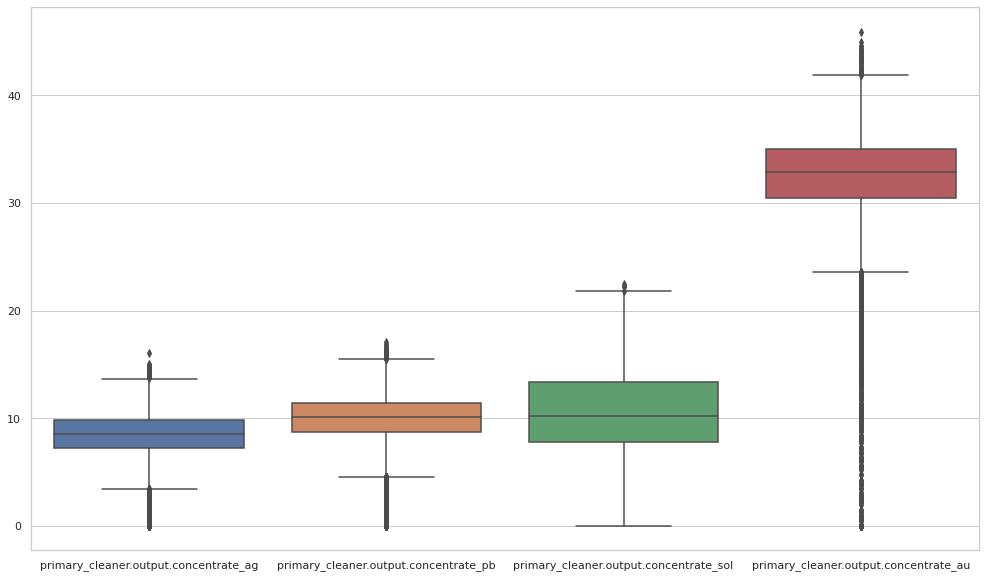

In [31]:
# Boxplot для концентрации металлов
plt.figure(figsize=(17,10))
a=sns.set(style="whitegrid")
a=sns.boxplot(data=concetrates_primary)

In [32]:
# Создаем датасеты с концентрациями металлов на финальной очистке
concetrates_final=[]
concetrates_final=pd.DataFrame(concetrates_final)
concetrates_final['final.output.concentrate_ag']=data_full['final.output.concentrate_ag']
concetrates_final['final.output.concentrate_pb']=data_full['final.output.concentrate_pb']
concetrates_final['final.output.concentrate_sol']=data_full['final.output.concentrate_sol']
concetrates_final['final.output.concentrate_au']=data_full['final.output.concentrate_au']

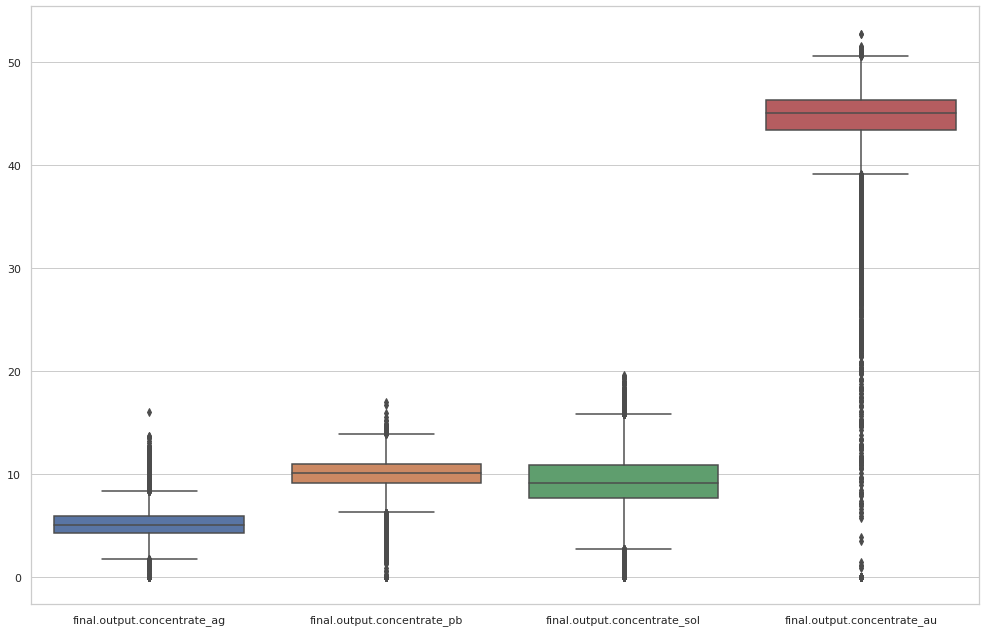

In [33]:
plt.figure(figsize=(17,11))
b=sns.set(style="whitegrid")
b=sns.boxplot(data=concetrates_final)

Из графика видно, что имеются выбросы. Больше всего их в концентрации золота (AU) на стадии первичной и финальной очистки. Среднее значение концентрации золота на финальной очистке выросло по сравнению с первичной очисткой.

In [34]:
# Создаем датасеты с концентрацией Ag на каждом этапе
concetrates_cycle_ag=[]
concetrates_cycle_ag=pd.DataFrame(concetrates_cycle_ag)
concetrates_cycle_ag['rougher.input.feed_ag']=data_full['rougher.input.feed_ag']
concetrates_cycle_ag['rougher.output.concentrate_ag']=data_full['rougher.output.concentrate_ag']
concetrates_cycle_ag['primary_cleaner.output.concentrate_ag'] = data_full['primary_cleaner.output.concentrate_ag']
concetrates_cycle_ag['final.output.concentrate_ag']=data_full['final.output.concentrate_ag']

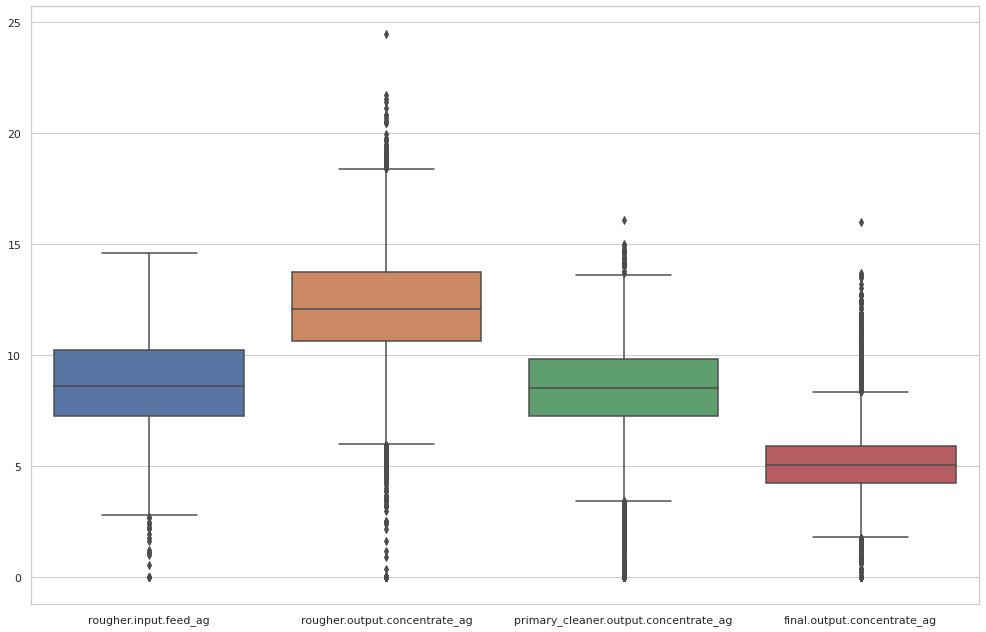

In [35]:
plt.figure(figsize=(17,11))
b=sns.set(style="whitegrid")
b=sns.boxplot(data=concetrates_cycle_ag)

Концентрация Ag (серебра) падает начиная с этапа флотации

In [36]:
# Создаем датасеты с концентрацией Au на каждом этапе
concetrates_cycle_au=[]
concetrates_cycle_au=pd.DataFrame(concetrates_cycle_au)
concetrates_cycle_au['rougher.input.feed_au']=data_full['rougher.input.feed_au']
concetrates_cycle_au['rougher.output.concentrate_au']=data_full['rougher.output.concentrate_au']
concetrates_cycle_au['primary_cleaner.output.concentrate_au'] = data_full['primary_cleaner.output.concentrate_au']
concetrates_cycle_au['final.output.concentrate_au']=data_full['final.output.concentrate_au']

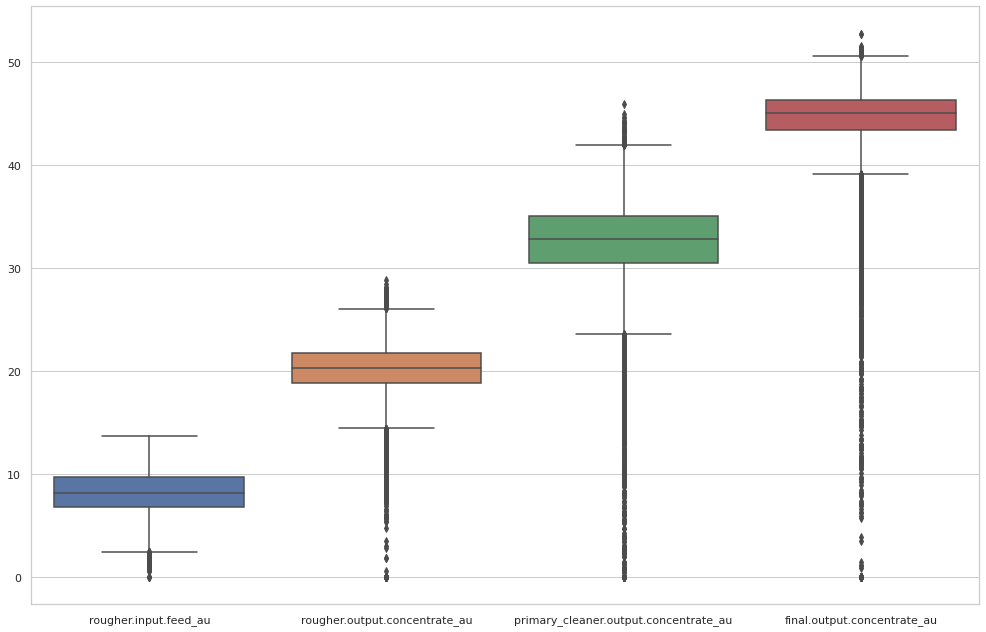

In [37]:
plt.figure(figsize=(17,11))
b=sns.set(style="whitegrid")
b=sns.boxplot(data=concetrates_cycle_au)

Концентрация Au (золота) растет на протяжеии всех этапов

In [38]:
# Создаем датасеты с концентрацией Pb на каждом этапе
concetrates_cycle_pb=[]
concetrates_cycle_pb=pd.DataFrame(concetrates_cycle_pb)
concetrates_cycle_pb['rougher.input.feed_pb']=data_full['rougher.input.feed_pb']
concetrates_cycle_pb['rougher.output.concentrate_pb']=data_full['rougher.output.concentrate_pb']
concetrates_cycle_pb['primary_cleaner.output.concentrate_pb'] = data_full['primary_cleaner.output.concentrate_pb']
concetrates_cycle_pb['final.output.concentrate_pb']=data_full['final.output.concentrate_pb']

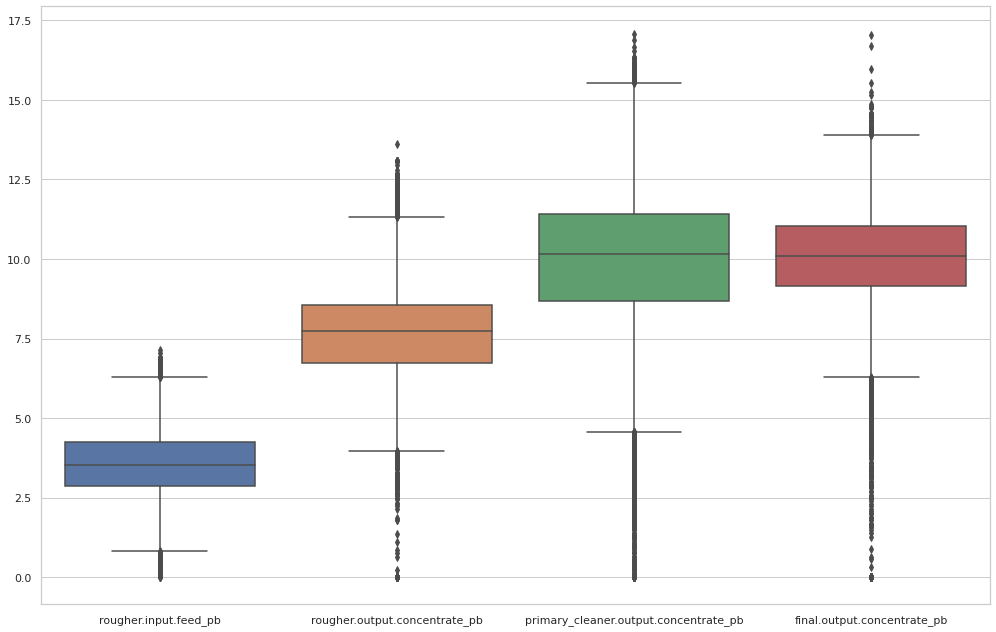

In [39]:
plt.figure(figsize=(17,11))
b=sns.set(style="whitegrid")
b=sns.boxplot(data=concetrates_cycle_pb)

Концентрация Pb (свинца) медленно растет на протяжении всех этапов очистки

Распределение на этапе первичной очистки

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Friqency')

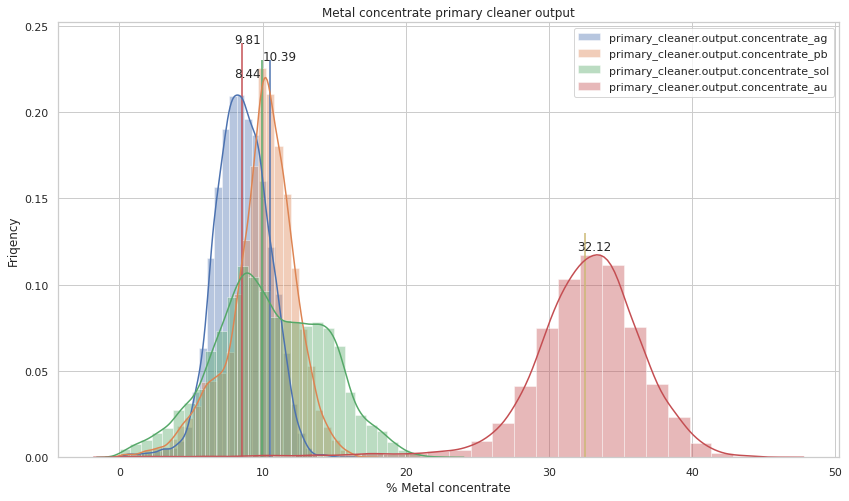

In [40]:
plt.figure(figsize=(14,8))
sns.distplot(data_full[data_full['primary_cleaner.output.concentrate_ag']>0.3]['primary_cleaner.output.concentrate_ag'],bins=30,label='primary_cleaner.output.concentrate_ag')
sns.distplot(data_full[data_full['primary_cleaner.output.concentrate_pb']>0.01]['primary_cleaner.output.concentrate_pb'],bins=30,label='primary_cleaner.output.concentrate_pb')
sns.distplot(data_full[data_full['primary_cleaner.output.concentrate_sol']>0.01]['primary_cleaner.output.concentrate_sol'],bins=30,label='primary_cleaner.output.concentrate_sol')
sns.distplot(data_full[data_full['primary_cleaner.output.concentrate_au']>0.01]['primary_cleaner.output.concentrate_au'],bins=30,label='primary_cleaner.output.concentrate_au')
plt.vlines(data_full[data_full['primary_cleaner.output.concentrate_ag']>0.3]['primary_cleaner.output.concentrate_ag'].mean(),0,0.24,color = 'r')
plt.vlines(data_full[data_full['primary_cleaner.output.concentrate_pb']>0.3]['primary_cleaner.output.concentrate_pb'].mean(),0,0.23,color = 'g')
plt.vlines(data_full[data_full['primary_cleaner.output.concentrate_sol']>0.3]['primary_cleaner.output.concentrate_sol'].mean(),0,0.23,color = 'b')
plt.vlines(data_full[data_full['primary_cleaner.output.concentrate_au']>0.3]['primary_cleaner.output.concentrate_au'].mean(),0,0.13,color = 'y')

plt.text(8,0.22,round(data_full['primary_cleaner.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.24,round(data_full['primary_cleaner.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(10,0.23,round(data_full['primary_cleaner.output.concentrate_sol'].mean(),2),fontsize=12)
plt.text(32,0.12,round(data_full['primary_cleaner.output.concentrate_au'].mean(),2),fontsize=12)
plt.legend()
plt.title('Metal concentrate primary cleaner output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")

Распределение на этапе финальной очистки

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Friqency')

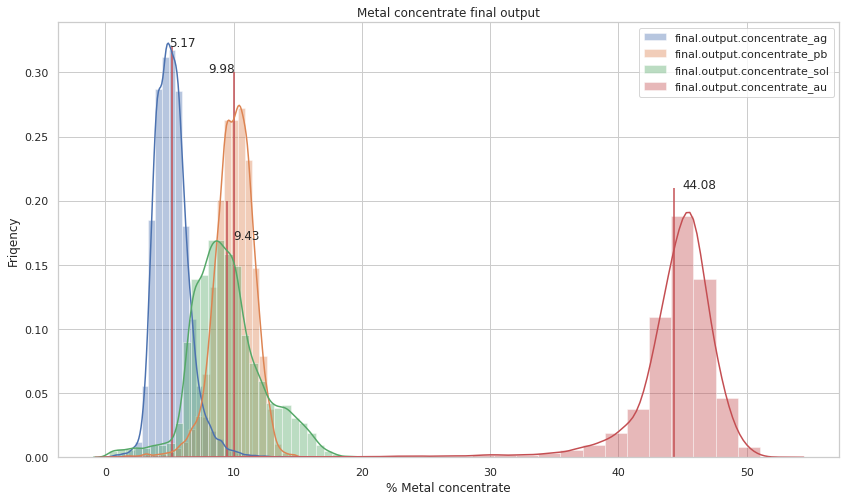

In [41]:
plt.figure(figsize=(14,8))
sns.distplot(data_full[data_full['final.output.concentrate_ag']>0.03]['final.output.concentrate_ag'],bins=30,label='final.output.concentrate_ag')
sns.distplot(data_full[data_full['final.output.concentrate_pb']>0.03]['final.output.concentrate_pb'],bins=30,label='final.output.concentrate_pb')
sns.distplot(data_full[data_full['final.output.concentrate_sol']>0.03]['final.output.concentrate_sol'],bins=30,label='final.output.concentrate_sol')
sns.distplot(data_full[data_full['final.output.concentrate_au']>0.03]['final.output.concentrate_au'],bins=30,label='final.output.concentrate_au')
plt.vlines(data_full[data_full['final.output.concentrate_ag']>0.3]['final.output.concentrate_ag'].mean(),0,0.32,color = 'r')
plt.vlines(data_full[data_full['final.output.concentrate_pb']>0.3]['final.output.concentrate_pb'].mean(),0,0.30,color = 'r')
plt.vlines(data_full[data_full['final.output.concentrate_sol']>0.3]['final.output.concentrate_sol'].mean(),0,0.20,color = 'r')
plt.vlines(data_full[data_full['final.output.concentrate_au']>0.3]['final.output.concentrate_au'].mean(),0,0.21,color = 'r')

plt.text(5,0.32,round(data_full['final.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.30,round(data_full['final.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(10,0.17,round(data_full['final.output.concentrate_sol'].mean(),2),fontsize=12)
plt.text(45,0.21,round(data_full['final.output.concentrate_au'].mean(),2),fontsize=12)

plt.legend()
plt.title('Metal concentrate final output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")

Выводы:
Распределения концентрации металлов менялись после каждой процедуры.
Среднее значение концентрации золота после первичной очистки было 32.12%. После финальной очистки значение средней концентрации золота стало 44.08%. Общие значения стали более приближены к среднему значению. 

Распределение металла на этапе флотации

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Friqency')

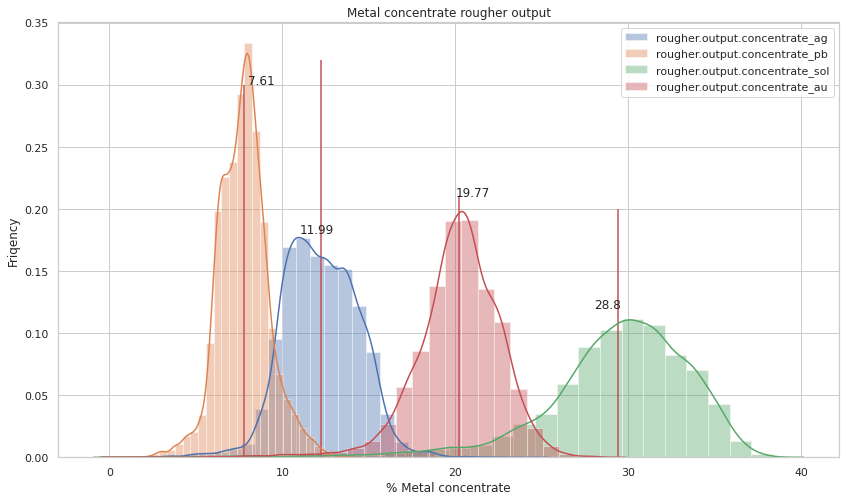

In [42]:
#rougher.output.concentrate_au
plt.figure(figsize=(14,8))
sns.distplot(data_full[data_full['rougher.output.concentrate_ag']>0.03]['rougher.output.concentrate_ag'],bins=30,label='rougher.output.concentrate_ag')
sns.distplot(data_full[data_full['rougher.output.concentrate_pb']>0.03]['rougher.output.concentrate_pb'],bins=30,label='rougher.output.concentrate_pb')
sns.distplot(data_full[data_full['rougher.output.concentrate_sol']>0.03]['rougher.output.concentrate_sol'],bins=30,label='rougher.output.concentrate_sol')
sns.distplot(data_full[data_full['rougher.output.concentrate_au']>0.03]['rougher.output.concentrate_au'],bins=30,label='rougher.output.concentrate_au')
plt.vlines(data_full[data_full['rougher.output.concentrate_ag']>0.3]['rougher.output.concentrate_ag'].mean(),0,0.32,color = 'r')
plt.vlines(data_full[data_full['rougher.output.concentrate_pb']>0.3]['rougher.output.concentrate_pb'].mean(),0,0.30,color = 'r')
plt.vlines(data_full[data_full['rougher.output.concentrate_sol']>0.3]['rougher.output.concentrate_sol'].mean(),0,0.20,color = 'r')
plt.vlines(data_full[data_full['rougher.output.concentrate_au']>0.3]['rougher.output.concentrate_au'].mean(),0,0.21,color = 'r')

plt.text(11,0.18,round(data_full['rougher.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.30,round(data_full['rougher.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(28,0.12,round(data_full['rougher.output.concentrate_sol'].mean(),2),fontsize=12)
plt.text(20,0.21,round(data_full['rougher.output.concentrate_au'].mean(),2),fontsize=12)

plt.legend()
plt.title('Metal concentrate rougher output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")

Среднее значение конентрации золота - 11.99%. После флотации оно увеличилось до 28.8.
Также увеличилась и концентрация других металлов.

2.2 Распределения размеров гранул сырья на обучающей и тестовой выборках

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

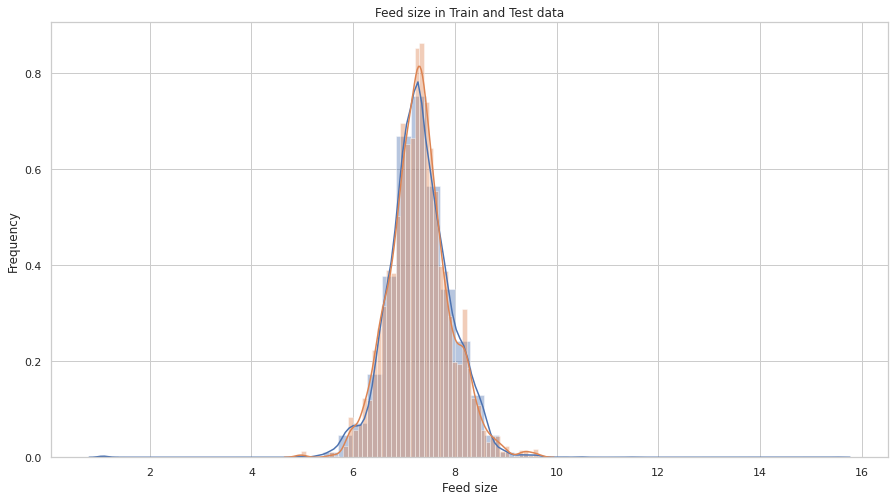

In [43]:
plt.figure(figsize=(15,8))
sns.distplot(data_train['primary_cleaner.input.feed_size'],label='train primary_cleaner.input.feed_size')
sns.distplot(data_test['primary_cleaner.input.feed_size'],label='test primary_cleaner.input.feed_size')
plt.title('Feed size in Train and Test data')
plt.legend
plt.xlabel('Feed size')
plt.ylabel('Frequency')

Вывод:
Распределения обучающей и тестовой выборки практически совпадают. Можно считать тестовую выборку репрезентативной.

2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [44]:
#Посчитаем сумму концентраций металлов после флотации
data_full['sum_concentrate_rougher']=data_full['rougher.output.concentrate_ag']+data_full['rougher.output.concentrate_pb']+data_full['rougher.output.concentrate_sol']+data_full['rougher.output.concentrate_au']


In [45]:
# Посчитаем сумму концентраций металлов после первичной очистки
data_full['sum_primary_cleaner_output_concentrate']=data_full['primary_cleaner.output.concentrate_ag']+data_full['primary_cleaner.output.concentrate_pb']+data_full['primary_cleaner.output.concentrate_sol']+data_full['primary_cleaner.output.concentrate_au']


In [46]:
# Посчитаем сумму концентраций металлов после финальной очистки
data_full['sum_final_output_concentrate']=data_full['final.output.concentrate_ag']+data_full['final.output.concentrate_pb']+data_full['final.output.concentrate_sol']+data_full['final.output.concentrate_au']


In [47]:
sum_concentrate=['sum_concentrate_rougher','sum_primary_cleaner_output_concentrate','sum_final_output_concentrate']

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Frequency')

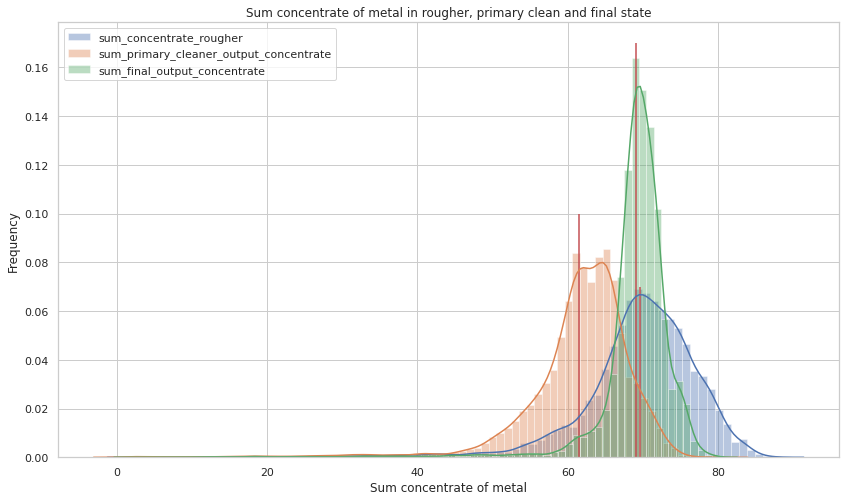

In [48]:
plt.figure(figsize=(14,8))
sns.distplot(data_full[data_full['sum_concentrate_rougher']>0.04]['sum_concentrate_rougher'],bins=80,label='sum_concentrate_rougher')
sns.distplot(data_full[data_full['sum_primary_cleaner_output_concentrate']>0.04]['sum_primary_cleaner_output_concentrate'],bins=80,label='sum_primary_cleaner_output_concentrate')
sns.distplot(data_full[data_full['sum_final_output_concentrate']>0.04]['sum_final_output_concentrate'],bins=80,label='sum_final_output_concentrate')
plt.vlines(data_full[data_full['sum_concentrate_rougher']>0.3]['sum_concentrate_rougher'].mean(),0,0.07,color = 'r')
plt.vlines(data_full[data_full['sum_primary_cleaner_output_concentrate']>0.3]['sum_primary_cleaner_output_concentrate'].mean(),0,0.10,color = 'r')
plt.vlines(data_full[data_full['sum_final_output_concentrate']>0.3]['sum_final_output_concentrate'].mean(),0,0.17,color = 'r')
plt.legend()
plt.title('Sum concentrate of metal in rougher, primary clean and final state')
plt.xlabel("Sum concentrate of metal")
plt.ylabel("Frequency")

По распределению видно, что присутствуют выбросы. Удалим значения от 0 до 40, их очень много, а чистота их нулевая.

In [49]:
data_full=data_full[data_full['sum_final_output_concentrate']>40]
data_full=data_full[data_full['sum_primary_cleaner_output_concentrate']>40]
data_full=data_full[data_full['sum_concentrate_rougher']>40]
data_full.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,sum_concentrate_rougher,sum_primary_cleaner_output_concentrate,sum_final_output_concentrate
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.4

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Frequency')

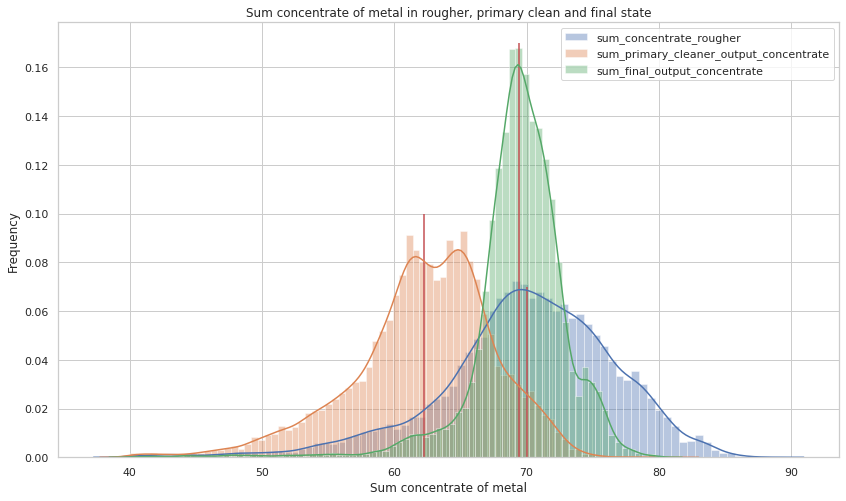

In [50]:
plt.figure(figsize=(14,8))
sns.distplot(data_full['sum_concentrate_rougher'],bins=80,label='sum_concentrate_rougher')
sns.distplot(data_full['sum_primary_cleaner_output_concentrate'],bins=80,label='sum_primary_cleaner_output_concentrate')
sns.distplot(data_full['sum_final_output_concentrate'],bins=80,label='sum_final_output_concentrate')
plt.vlines(data_full['sum_concentrate_rougher'].mean(),0,0.07,color = 'r')
plt.vlines(data_full['sum_primary_cleaner_output_concentrate'].mean(),0,0.10,color = 'r')
plt.vlines(data_full['sum_final_output_concentrate'].mean(),0,0.17,color = 'r')
plt.legend()
plt.title('Sum concentrate of metal in rougher, primary clean and final state')
plt.xlabel("Sum concentrate of metal")
plt.ylabel("Frequency")

Убрали выбросы 

In [51]:
print(data_full['rougher.output.concentrate_ag'])

date
2016-01-15 00:00:00    11.500771
2016-01-15 01:00:00    11.615865
2016-01-15 02:00:00    11.695753
2016-01-15 03:00:00    11.915047
2016-01-15 04:00:00    12.411054
                         ...    
2018-08-18 06:59:59    11.039123
2018-08-18 07:59:59    11.231501
2018-08-18 08:59:59    11.309414
2018-08-18 09:59:59    11.528770
2018-08-18 10:59:59    11.116297
Name: rougher.output.concentrate_ag, Length: 18109, dtype: float64


## Модель

In [52]:
# Функция метрики качества
def sMAPE(target, predictions):
    smape = 1 / len(target) * np.sum(
        (np.abs(target - predictions)) / ((np.abs(target) + np.abs(predictions)) / 2)) * 100
    return smape

In [53]:
smape_scorer = make_scorer(sMAPE, greater_is_better = False)

In [54]:
def sMAPE_final(rougher, final):
    fin_smape = 0.25 * rougher + 0.75 * final
    return fin_smape

Обучим различные модели и оценим качество кросс-валидацией

In [55]:
X_features_train_rougher = data_train.drop(['rougher.output.recovery'], axis=1)
y_target_train_rougher = data_train['rougher.output.recovery']

X_features_test_rougher = data_test.drop(['rougher.output.recovery'], axis=1)
y_target_test_rougher =data_test['rougher.output.recovery']

X_features_train_final = data_train.drop(['final.output.recovery'], axis=1)
y_target_train_final = data_train['final.output.recovery']

X_features_test_final = data_test.drop(['final.output.recovery'], axis=1)
y_target_test_final =data_test['final.output.recovery']


Дерево решений

In [56]:
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(X_features_train_rougher, y_target_train_rougher)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для дерева решений: 13.258645020962586 при значениях гиперпараметров: {'max_depth': 5}


Случайный лес

In [57]:
param_grid = {'n_estimators': range(10, 31, 10)}

model = RandomForestRegressor(max_depth=2, random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(X_features_train_rougher, y_target_train_rougher)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 12.702998683102063 при значениях гиперпараметров: {'n_estimators': 30}


Линейная регрессия

In [58]:
model = LinearRegression()
model.fit(X_features_train_rougher, y_target_train_rougher)
smape = cross_val_score(model, X_features_train_rougher, y_target_train_rougher, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smape)

Лучшее значение sMAPE для линейной регрессии: 13.291850611159086


Выяснили, что лучшая модель - Cлучайный лес. 

Дерево решений

In [59]:
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(X_features_train_final, y_target_train_final)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для дерева решений: 9.621534561634414 при значениях гиперпараметров: {'max_depth': 3}


Случайный лес

In [60]:
param_grid = {'n_estimators': range(10, 31, 10)}

model = RandomForestRegressor(max_depth=2, random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(X_features_train_final, y_target_train_final)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 9.46917849500418 при значениях гиперпараметров: {'n_estimators': 20}


Линейная регрессия

In [61]:
model = LinearRegression()
model.fit(X_features_train_final, y_target_train_final)
smape = cross_val_score(model, X_features_train_final, y_target_train_final, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smape)

Лучшее значение sMAPE для линейной регрессии: 10.91378127462557


Выяснили, что лучшая модель - Cлучайный лес. Проверим ее качество на тестовой выборке.

In [63]:
model = RandomForestRegressor(max_depth=2, n_estimators=30, random_state=RANDOM_STATE) 
model.fit(X_features_train_rougher, y_target_train_rougher)
predicted_rougher = model.predict(X_features_test_rougher)

model_rfr_final_test = RandomForestRegressor(n_estimators=20, max_depth=2, random_state=RANDOM_STATE)
model_rfr_final_test.fit(X_features_train_final, y_target_train_final)
predicted_final = model_rfr_final_test.predict(X_features_test_final)

smape_for_rougher_test = sMAPE(y_target_test_rougher, predicted_rougher)
smape_for_final_test = sMAPE(y_target_test_final, predicted_final)
final_smape_test = sMAPE_final(smape_for_rougher_test, smape_for_final_test)

print('sMAPE тестовой:', final_smape_test)

sMAPE тестовой: 7.158941017814504


In [64]:
#dct_with_scores = {}

In [ ]:
#%%time

#model_lr_rougher = LinearRegression(normalize=True)
#smape_rougher = cross_val_score(model_lr_rougher,
#                          X_features_train_rougher,
#                          y_target_train_rougher,
#                          scoring = smape_scorer,
#                          cv = 5)
#result_smape_rougher = smape_rougher.mean()

#model_lr_final = LinearRegression()
#smape_final = cross_val_score(model_lr_final,
#                        X_features_train_final,
#                        y_target_train_final,
#                        scoring = smape_scorer,
#                        cv = 5)
#result_smape_final = smape_final.mean()

#result_smape = np.abs(sMAPE_final(result_smape_rougher, result_smape_final))
#dct_with_scores['LR'] = [result_smape]
#print(dct_with_scores['LR'])

Модель DecisionTreeRegressor

In [ ]:
#%%time

#state = RandomState(12345)

#best_result_dtr = 100
#best_param_dtr = 0
#for n in range(1, 10, 1):
#    model_dtr_rougher = DecisionTreeRegressor(max_depth=n, random_state=state)
#    smape_rougher = cross_val_score(model_dtr_rougher,
#                              X_features_train_rougher,
#                              y_target_train_rougher,
#                              scoring=smape_scorer,
#                              cv=5)
#    result_smape_rougher = smape_rougher.mean()
#
#    model_dtr_final = DecisionTreeRegressor(max_depth=n, random_state=state)
#    smape_final = cross_val_score(model_dtr_final, 
#                                  X_features_train_final,
#                                  y_target_train_final,
#                                  scoring=smape_scorer,
#                                  cv=5)
#    result_smape_final = smape_final.mean()
    
#    result_smape = np.abs(sMAPE_final(result_smape_rougher, result_smape_final))
#    if result_smape < best_result_dtr:
#        best_result_dtr = result_smape
#        best_param_dtr = n
#dct_with_scores['DTR'] = [best_result_dtr, best_param_dtr]
#print(dct_with_scores['DTR'])
#print('max_depth (глубина дерева)', best_param_dtr)

Модель RandomForestRegressor

In [ ]:
#%%time

#best_model_rfr = 100
#best_param_rfr = 0

#for n in range(10, 100, 30):
#    for d in range(2,10,2):
#        model_rfr_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
#        smape_rougher = cross_val_score(model_rfr_rougher,
#                                  X_features_train_rougher,
#                                  y_target_train_rougher,
#                                  scoring=smape_scorer,
#                                  cv=5)
#        result_smape_rougher = smape_rougher.mean()
#
#        model_rfr_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
#        smape_final = cross_val_score(model_rfr_final,
#                                X_features_train_final,
#                                y_target_train_final,
#                                scoring=smape_scorer,
#                                cv=5)
#        result_smape_final = smape_final.mean()
        
#        result_smape = np.abs(sMAPE_final(result_smape_rougher, result_smape_final))
#        if result_smape < best_model_rfr:
#            best_model_rfr = result_smape
#            best_param_rfr = [n,d]
#dct_with_scores['RFR'] = [best_model_rfr, best_param_rfr]
#print(dct_with_scores['RFR'])

In [ ]:
#for key in dct_with_scores.keys():
#    print(f'\nМодель {str(key).upper()} - {dct_with_scores[key][0]}')

Лучшая модель - модель RFR (RandomForestRegressor) - с лучшей итоговой меткой.

In [ ]:
#print('Лучшие параметры для модели RFR:\nn_estimators (число деревьев) - {},\nmax_depth (глубина дерева) - {}'.format(
#        dct_with_scores[
#        'RFR'][1][0], dct_with_scores['RFR'][1][1]))

Проверка лучшей модели на тестовой выборке

In [ ]:
#model_rfr_rougher_test = RandomForestRegressor(n_estimators=70, max_depth=2, random_state=state)
#model_rfr_rougher_test.fit(X_features_train_rougher, y_target_train_rougher)
#predicted_rougher = model_rfr_rougher_test.predict(X_features_test_rougher)

#model_rfr_final_test = RandomForestRegressor(n_estimators=70, max_depth=2, random_state=state)
#model_rfr_final_test.fit(X_features_train_final, y_target_train_final)
#predicted_final = model_rfr_final_test.predict(X_features_test_final)

#smape_for_rougher_test = sMAPE(y_target_test_rougher, predicted_rougher)
#smape_for_final_test = sMAPE(y_target_test_final, predicted_final)
#final_smape_test = sMAPE_final(smape_for_rougher_test, smape_for_final_test)

#print('sMAPE тестовой:', final_smape_test)

Проверка на адекватность

In [65]:
model_dummy_rfr_rougher = DummyRegressor(strategy="mean")
model_dummy_rfr_rougher.fit(X_features_train_rougher, y_target_train_rougher)
predicted_dummy_rougher = model_dummy_rfr_rougher.predict(X_features_test_rougher)
smape_rougher_dummy = sMAPE(y_target_test_rougher, predicted_dummy_rougher)

model_dummy_rfr_final = DummyRegressor(strategy="mean")
model_dummy_rfr_final.fit(X_features_train_final, y_target_train_final)
predicted_dummy_final = model_dummy_rfr_final.predict(X_features_test_final)
smape_final_dummy = sMAPE(y_target_test_final, predicted_dummy_final)

final_smape_dummy = sMAPE_final(smape_rougher_dummy, smape_final_dummy)

print('sMAPE константной:', final_smape_dummy)

sMAPE константной: 8.843396027364125


Показатель модели RFR (RandomForestRegressor) меньше константной.

Вывод:

Загрузили данные.
Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи. 
В данных есть пропуски, видимо потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.

Датасет train содержит 87 столбцов и 14579 строк.

Датасет test содержит 53 столбцов и 4860 строк.

Датасет full содержит 87 столбцов и 19439 строк.

Во всех датасетах есть пропуски. Видимо из-за того, что некоторые параметры замеряются и/или рассчитываются значительно позже.

Всего пропусков в обучающей выборке: 3050

Всего пропусков в тестовой выборке: 375

Всего пропусков в исходных данных: 4481

Тестовая выборка составляет 25% от исходных данных, обучающая выборка - 75% от исходных данных.

Все столбцы, кроме 'date', имеют тип данных float64, заменили тип данных столбца 'date' с object на datetime.

Дубликаты отсутствуют.

Эффективность обогащения - MAE между расчетами и значением признака: выполнено правильно, так как значение MAE между столбцом rougher.output.recovery и нашими расчетами было очень близко к 0 (0.00000000000000973), следовательно, расчеты верны.

Выровняли число столбцов в обучающей и тестовой выборках разное. В test добавили отсутствующие 'rougher.output.recovery','final.output.recovery'. Установили столбец 'date' индексом.

Провели предварительный анализ данных. Концентрация золота увеличивается на каждом этапе очистки увеличивается на каждом этапе. В отвальных хвостах - концентрация снижается к финальной очистке. 
Противоположная тенденция в отношении концентрации серебра: чем больше мы очищаем сырье, тем ниже становится доля этого металла. Концентрация серебра увеличивается после флотации, после первичной очистки видно снижение и увеличение финальной концентрации. В отвальных хвостах - увеличивается после флотации, далее почти не изменяется.
Концентрации свинца: Концентрация свинца уменьшается после первичной очистки, затем финальная концентрация увеличивается. В отвальных хвостах увеличение концентрации после флотации, далее одинаковый уровень. 

Размер гранул сырья в обучающей и тестовой выборках содержат столбцы 'primary_cleaner.input.feed_size' и 'rougher.input.feed_size'. Распределение размера гранул: перед флотацией оба распределения имеют скошенность вправо с длинными хвостами. После флотации распределение нормализуется. Распределение размера гранул не сильно различается, оценка модели будет корректной. Линейное и тестовое распределения размеров частиц сырья очень близки друг к другу.

На следующем этапе мы разработали и протестировали несколько алгоритмов ML и настроили гиперпараметры наилучшей модели.

Модель LR - 13.291850611159086, Модель DTR - 13.258645020962586, Модель RFR - 12.702998683102063. На этапе rougher

Модель LR - 10.91378127462557, Модель DTR - 9.621534561634414, Модель RFR - 9.46917849500418. На этапе final

Лучшая модель - модель RFR (RandomForestRegressor) - с лучшей итоговой меткой 12.702998683102063. 
Лучшая модель - модель RFR (RandomForestRegressor) - с лучшей итоговой меткой 9.46917849500418. 

Лучшие параметры для модели RFR: n_estimators (число деревьев) - 30 для rougher и 20 для final, max_depth (глубина дерева) - 2.
Затем мы протестировали нашу модель на тестовом наборе. Мы достигли уровня ошибок в тестовом наборе 7.158941017814504. Проверили модель на адекватность, сравнили итоговую оценку с базовой. Показатель модели RFR (RandomForestRegressor) 7.158941017814504, меньше константной - 8.843396027364125